<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/develop-microsim/examples/crime_sim_Microsimulator_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example notebook for using the crime_sim_toolkit Microsimulator Class

Follow these steps to load your own data into the crime_sim_toolkit for simulating crime demand using the Microsimulator Class.

This simulation class aims to model police demand by using victimisation data collected by police forces to estimate person level probabilities of experiencing crime. These probabilities are then used along side a synthetic population (generated using [ukpopulation](https://github.com/nismod/ukpopulation) package, a part of [SPENSER](https://www.turing.ac.uk/research/research-projects/synthetic-population-estimation-and-scenario-projection)) to simulate crime events each day, for each individual over one year.

## Notes on running
For this to run successfully follow these steps:


1.   Git clone the repo into the root dir
2.   Run pip install within the downloaded repo
3.   Reset the local runtime to allow for pip packages installed to work
4.   Then run python setup.py install on downloaded repo

The package should now be useable within the notebook.



In [1]:
%cd ~/

! git clone --single-branch --branch develop-microsim https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (273/273), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 1380 (delta 184), reused 197 (delta 127), pack-reused 1107
Receiving objects: 100% (1380/1380), 49.99 MiB | 25.76 MiB/s, done.
Resolving deltas: 100% (915/915), done.


In [2]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 163kB 4.4MB/s 
     |████████████████████████████████| 215kB 12.3MB/s 
     |████████████████████████████████| 92kB 6.9MB/s 
     |████████████████████████████████| 133kB 12.0MB/s 
     |████████████████████████████████| 286kB 12.1MB/s 
     |████████████████████████████████| 13.1MB 322kB/s 
     |████████████████████████████████| 20.4MB 1.4MB/s 
     |████████████████████████████████| 10.5MB 52.7MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 235kB 58.2MB/s 
     |████████████████████████████████| 512kB 57.1MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 6.7MB 32.8MB/s 
     |████████████████████████████████| 25.2MB 43.8MB/s 
     |████████████████████████████████| 153kB 51.9MB/s 
ERROR: tensorflow-model-optimization 0.2.1 requires enum34~=1.1, which is not installed.
ERROR: tensorflow-federated 0.12.0 has requirement t

# RESTART RUNTIME

In [1]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit


## Initialising a Microsimulator object

To get started we initialise a Microsimulator object. This object will contain all the data required for a given simulation and allows us to instantiate multiple microsimulator objects for different sets of data.

In [0]:
import os
import crime_sim_toolkit.microsim as Microsim


simulation_0 = Microsim.Microsimulator()

## Loading data into the Microsimulator object 
This example is built using dummy data that was built using the example notebook in the [data_manipulation directory](https://github.com/Sparrow0hawk/crime_sim_toolkit/tree/master/data_manipulation) which has randomly added age, gender and ethnicity categories to each crime report (crime reports downloaded from https://data.police.uk/data/ for West Yorkshire).



In [0]:
# specifing the directory path to where the test data is for this example
data_dir = '/root/crime_sim_toolkit/crime_sim_toolkit/tests/'

In [0]:
simulation_0.load_data(
                       # we specify the seed year, this is the year from which crime probabilities are determined
                       seed_year = 2017,
                       # a string to the directory where your police data is (police data explained above)
                       police_data_dir = os.path.join(data_dir,'testing_data/test_microsim/sample_vic_data_WY2017.csv'),
                       # a string to the directory where the population for the seed year is
                       # this is a synthetic population generated using SPENSER 
                       seed_pop_dir = os.path.join(data_dir,'testing_data/test_microsim/sample_seed_pop.csv'),
                       # the demographic columns for the seed synthetic population
                       spenser_demographic_cols = ['DC1117EW_C_SEX','DC1117EW_C_AGE','DC2101EW_C_ETHPUK11'],
                       # the columns that correspond to the demographic data in the police data
                       police_demographic_cols = ['sex','age','ethnicity']
                       )

In [14]:
# the object now has a seed population attribute of a pandas dataframe
simulation_0.seed_population.head()

,PID,Area,DC1117EW_C_SEX,DC1117EW_C_AGE,DC2101EW_C_ETHPUK11,demographic_profile
0,604227,E02002419,1,84,5,1-84-5
1,768139,E02006861,2,42,2,2-42-2
2,450602,E02002396,2,62,2,2-62-2
3,625142,E02002422,1,57,2,1-57-2
4,628015,E02002422,2,50,2,2-50-2


In [15]:
# the object also has a crime data attribute (also a pandas dataframe)
simulation_0.crime_data.head()

,Crime_ID,Month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_name,Crime_type,Last_outcome_category,LSOA_code,MSOA11CD,victim_profile,sex,age,ethnicity,Police_force,Crime_description,demographic_profile
0,e396faffa45e277e01cfd1ece4abf4be49395e8c628a13...,2017-08,West Yorkshire Police,West Yorkshire Police,-1.391752,53.753535,On or near Queen Street,Leeds 087C,Burglary,Unable to prosecute suspect,E01011392,E02002416,1-30-2,1,30,2,West Yorkshire,burglary business and community,1-30-2
1,63ec15793d588bfe0be854579fd1ea2e64ec9a03847116...,2017-10,West Yorkshire Police,West Yorkshire Police,-1.541890,53.794406,On or near Pitfall Street,Leeds 111C,Drugs,Offender given a caution,E01033011,E02006875,1-63-2,1,63,2,West Yorkshire,possession of controlled drugs (cannabis),1-63-2
2,49d5989438aeb2badc7639c8900dde4257155665d1d47a...,2017-12,West Yorkshire Police,West Yorkshire Police,-1.579941,53.801233,On or near Forge Lane,Leeds 071A,Other theft,Unable to prosecute suspect,E01011284,E02002400,1-42-2,1,42,2,West Yorkshire,theft in a dwelling other than from an automat...,1-42-2
3,206cbc5513dec3940961c1d6d1fd0c37a9446b4c1335d8...,2017-05,West Yorkshire Police,West Yorkshire Police,-1.689763,53.905710,On or near Manchester Square,Leeds 004E,Other theft,Investigation complete; no suspect identified,E01011574,E02002333,2-24-5,2,24,5,West Yorkshire,other theft,2-24-5
4,62a3e7978f3178fede6fbff7a73615f11f4f9332fb0b8b...,2017-07,West Yorkshire Police,West Yorkshire Police,-1.474077,53.713136,On or near Beaumont Street,Wakefield 007B,Violence and sexual offences,Status update unavailable,E01011876,E02002444,2-42-2,2,42,2,West Yorkshire,sexual grooming,2-42-2


## Loading the future synthetic population to simulate against
We then use the __load_future_pop function__ to load a synthetic population approximated for a given future year. SPENSER creates a large series of populations for consecutive years so this function expects a __directory of synthetic populations__ and will open the population for a given __year__.

In [0]:
simulation_0.load_future_pop(
                             # the directory to where synthetic populations are
                             synthetic_population_dir=os.path.join(data_dir, 'testing_data/test_microsim/test_future_pop'),
                             # which years population the user wishes to load
                             year=2019,
                             # the demographic columns within the dataset
                             demographic_cols=['DC1117EW_C_SEX','DC1117EW_C_AGE','DC2101EW_C_ETHPUK11'])



## Creating the probability table from the crime data
Now that we have all the data loaded we can now create the probability table. This calculates the probability of victimisation for a given crime for a person within a given demographic group. 

We call this function on the Microsimulator object and this creates a transition table attribute (a pandas dataframe object). The most important column (that is used for the simulation itself) is __chance_crime_per_day_demo__.

In [0]:
simulation_0.generate_probability_table()

In [18]:
simulation_0.transition_table.head()

,Crime_description,Month,day_in_month,demographic_profile,crime_counts,chance_crime_per_day_demo
0,burglary residential,2017-01,31,1-1-2,1,0.000597
1,shoplifting,2017-01,31,1-1-2,1,0.000597
2,criminal damage to a vehicle,2017-01,31,1-10-2,1,0.000529
3,criminal damage to a dwelling,2017-01,31,1-11-2,1,0.000556
4,burglary residential,2017-01,31,1-13-2,1,0.000686


## Running a simulation
Once the data is loaded, and the probability table has been generated we can now perform a simulation and generate crime data for a simulated year.

This will for each individual in the synthetic population for each day in a year simulate if they are victimised based on their demographic profile and the probabiltiy of victimisation for a given demography  for a given crime in a given month.

In [0]:
simulation_0.run_simulation()

We can then access the simulated years worth of crime by calling the __simulation_run__ attribute (pandas object).

In [21]:
simulation_0.simulation_run.head()

,Month,Day,Person,crime
0,2017-01,1,246575,burglary residential
1,2017-01,4,301275,burglary residential
1,2017-01,4,375302,burglary residential
2,2017-01,6,258546,burglary residential
3,2017-01,7,506183,burglary residential


### Examples of plotting outputted simulation data

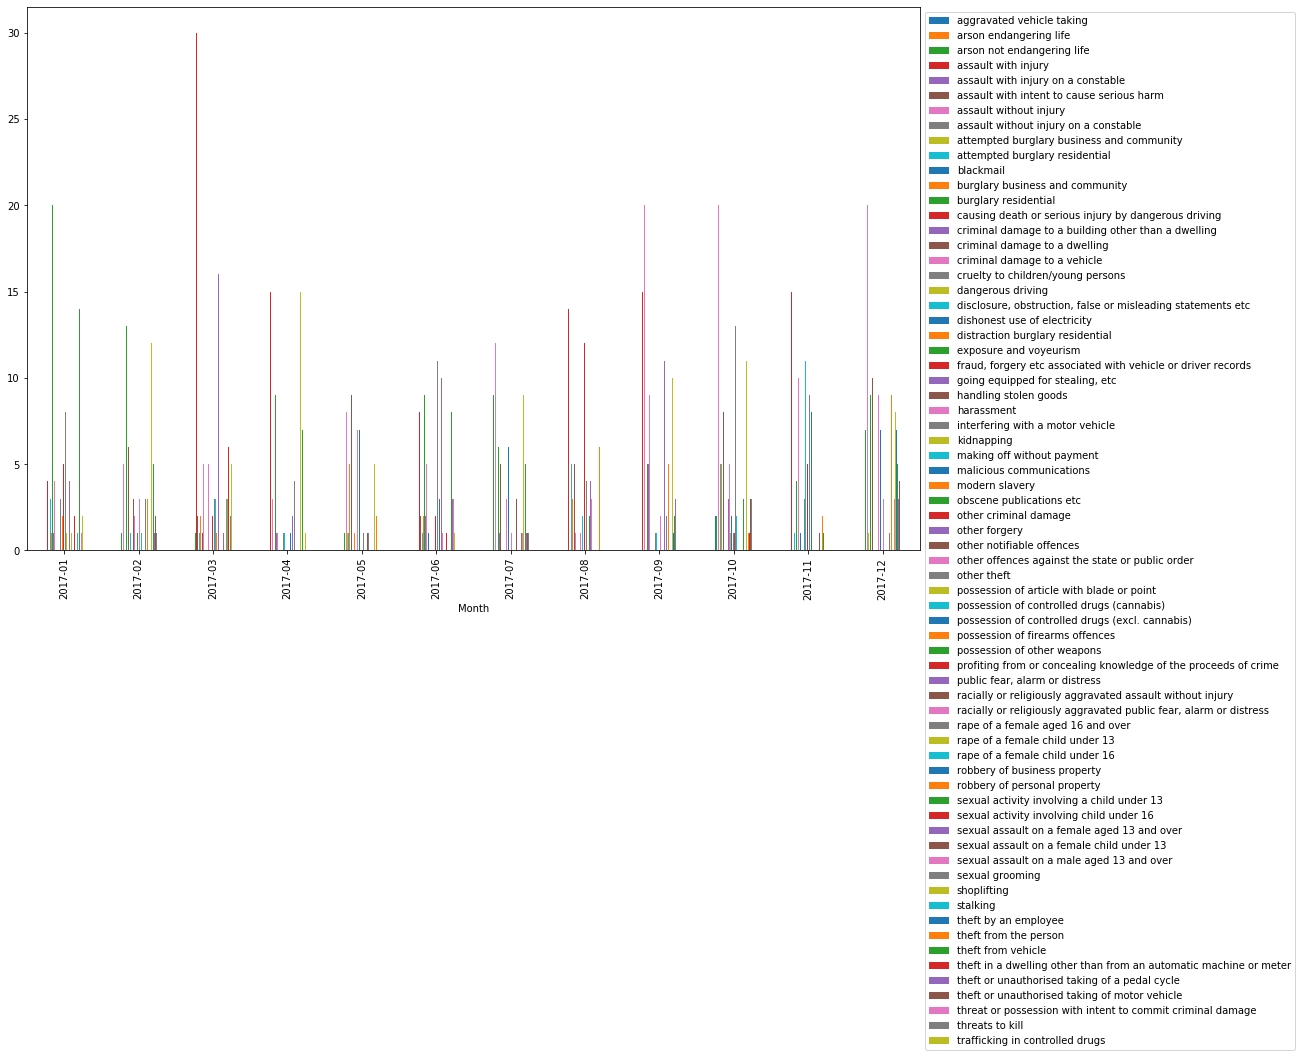

In [24]:
import matplotlib.pyplot as plt
simulation_0.simulation_run.groupby('Month')['crime'].value_counts().unstack().plot.bar(figsize=(16,10))

plt.legend(bbox_to_anchor=(1,1.0))

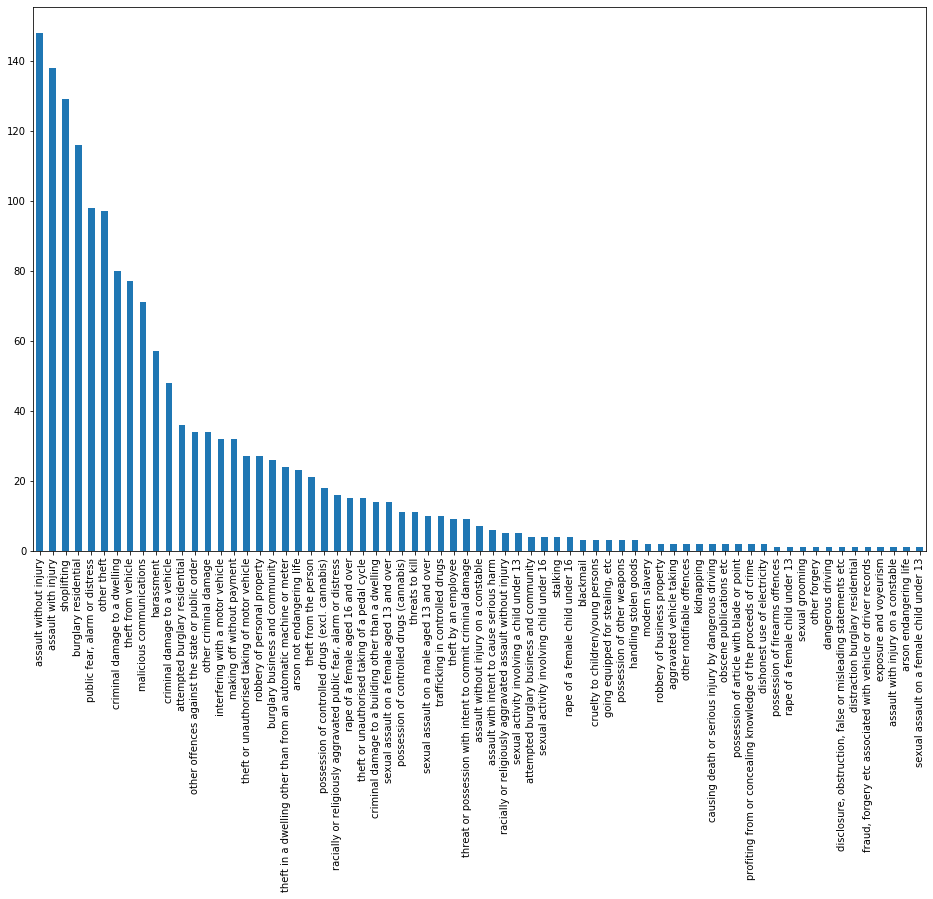

In [28]:
simulation_0.simulation_run.crime.value_counts().plot.bar(figsize=(16,10))

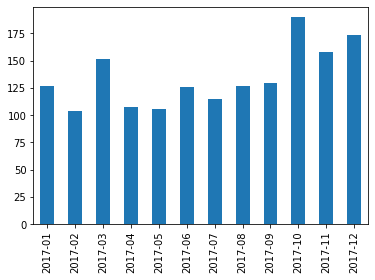

In [32]:
simulation_0.simulation_run.Month.value_counts().sort_index().plot.bar()